### README

This notebook requires `features` and `output` arrays stored as `features.npy`, `outputs.npy` in the current directory (`${PROJECT_ROOT}/data_analysis`).

To obtain the above arrays,
run `obtain_features.py` script after modifying the end of the code to store `features_` and `outputs_` arrays to disk.

`features_` is not required as of now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
# Directory to save plots

dir_path = "./"
plot_path = os.path.join(dir_path, "plots")
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

# Load preprocessed data

#features = np.load(os.path.join(dir_path,"features.npy"))
#print(features.shape)
outputs = np.load(os.path.join(dir_path,"outputs.npy"))
print(outputs.shape)

# Parameters

BIN_SIZE = 100

(66034284,)


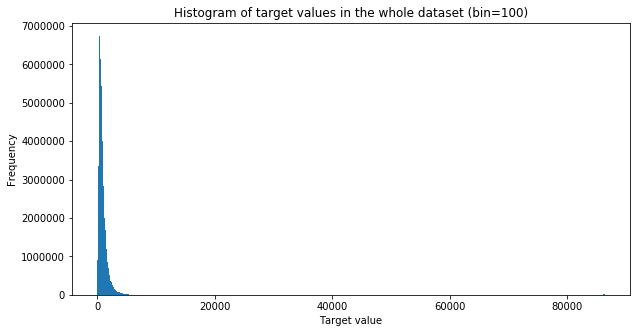

In [3]:
# Distribution of the whole dataset

fig, ax = plt.subplots(1,1,figsize=(10,5))

bins = np.linspace(0,86400,int(86400/BIN_SIZE) + 1)
n, bins, patches = ax.hist(outputs, bins=bins, density=False)
ax.set_xlabel("Target value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of target values in the whole dataset (bin={BIN_SIZE})")
plt.savefig(fname=os.path.join(plot_path,"whole_data_dist.png"))

In [4]:
# Histogram in numbers

print(len(n))
print(n.astype(int))

864
[ 905113 3353352 5883902 6738855 6646863 6127302 5431041 4696750 3998550
 3376711 2842715 2380682 2001019 1681422 1414485 1191185 1003802  844591
  710421  600547  509008  434355  371449  320333  278890  243760  213471
  190329  168226  150211  133779  120318  107309   96067   85249   76179
   68001   60966   53821   48421   43200   38179   33941   30348   26961
   23938   21260   18818   16364   14790   12894   11213    9881    8617
    7532    6718    5843    5011    4299    3872    3355    3008    2610
    2230    1979    1762    1611    1302    1181    1053     874     796
     683     715     583     552     454     382     400     334     323
     292     227     214     202     197     178     168     146     112
     133     107     104      97     103      97      85      70      88
      85      58      74      67      53      67      54      71      41
      52      53      36      58      55      56      49      48      47
      47      55      46      34      27      3

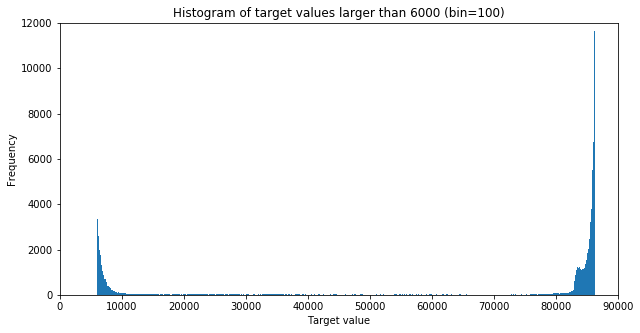

In [5]:
# Tail part of histogram

cutoff = 6000

fig, ax = plt.subplots(1,1,figsize=(10,5))

tail_bins = np.linspace(cutoff,86400,int((86400-cutoff) / BIN_SIZE)+1)
ax.hist(outputs, bins=tail_bins, density=False)
ax.set_xlim(0,90000)
ax.set_ylim(0,12000)
ax.set_xlabel("Target value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of target values larger than {cutoff} (bin={BIN_SIZE})")
plt.savefig(fname=os.path.join(plot_path,f"tail_{cutoff}_dist.png"))

In [6]:
# Basic statistics

mean = np.mean(outputs)
median = np.median(outputs)
stddev = np.std(outputs)

print(mean)
print(median)
print(stddev)
print(mean+2*stddev)

971.452081860992
660.0
3262.2351533140936
7495.922388489179


4300
[ 905113 3353352 5883902 6738855 6646863 6127302 5431041 4696750 3998550
 3376711 2842715 2380682 2001019 1681422 1414485 1191185 1003802  844591
  710421  600547  509008  434355  371449  320333  278890  243760  213471
  190329  168226  150211  133779  120318  107309   96067   85249   76179
   68001   60966   53821   48421   43200   38179   33941]
0.9945556462761072


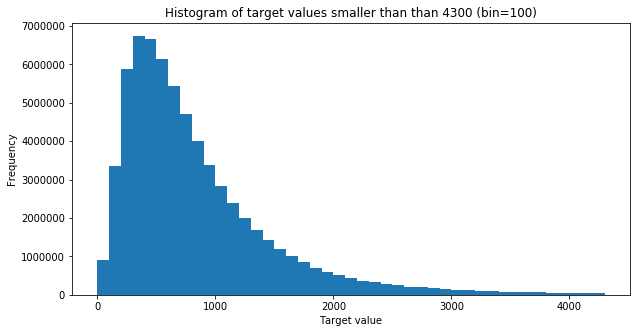

In [7]:
# Cut off outliers

cutoff = np.floor((mean+1*stddev + BIN_SIZE) / BIN_SIZE).astype(int) * BIN_SIZE
print(cutoff)
print(n.astype(int)[:int(cutoff/100)])

print(np.sum(n[:int(cutoff/100)]) / len(outputs))

# New distribution after outliers removed

fig, ax = plt.subplots(1,1,figsize=(10,5))

new_bins = np.linspace(0,cutoff,int(cutoff/100+1))
ax.hist(outputs, bins=new_bins, density=False)
ax.set_xlabel("Target value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of target values smaller than than {cutoff} (bin={BIN_SIZE})")
plt.savefig(fname=os.path.join(plot_path,f"cleaned_{cutoff}_dist.png"))

In [8]:
# Collect statistics for different cutoff multipliers
# (-1 as multiplier is used to indicate the whole dataset)

BIN_SIZE = 100

OUTPUTS_SUM = np.sum(outputs)
OUTPUTS_LEN = len(outputs)

mul_grid = [-1,0.25,0.5,1,2]
column_names = ["multiplier","cutoff_val","mean","stddev","count","count_coverage","sum_coverage"]
results_tbl = np.zeros([len(mul_grid), len(column_names)])

results_tbl[0] = [mul_grid[0],86400,mean,stddev,len(outputs),1,1]
for idx, multiplier in enumerate(mul_grid[1:]):
    cutoff = np.floor((mean+multiplier*stddev + BIN_SIZE) / BIN_SIZE).astype(int) * BIN_SIZE
    
    cutoff_outputs = outputs[outputs <= cutoff]
    cutoff_mean = np.mean(cutoff_outputs)
    cutoff_stddev = np.std(cutoff_outputs)
    cutoff_count = len(cutoff_outputs)
    cnt_cvg = cutoff_count / OUTPUTS_LEN
    sum_cvg = cutoff_mean * (cutoff_count / OUTPUTS_SUM)
    
    results_tbl[idx+1] = [multiplier, cutoff, cutoff_mean, cutoff_stddev, cutoff_count, cnt_cvg, sum_cvg]

np.set_printoptions(linewidth=130, precision=4, suppress=True)

print(column_names)
print(results_tbl)

np.savetxt(fname=os.path.join(dir_path, "multiplier_tbl.csv"), X=results_tbl,
           delimiter=",", fmt="%.4f", header=",".join(column_names))

['multiplier', 'cutoff_val', 'mean', 'stddev', 'count', 'count_coverage', 'sum_coverage']
[[      -1.        86400.          971.4521     3262.2352 66034284.            1.            1.    ]
 [       0.25       1800.          692.3788      404.7286 60526920.            0.9166        0.6533]
 [       0.5        2700.          775.8801      522.3131 64202988.            0.9723        0.7765]
 [       1.         4300.          831.7866      638.0315 65675125.            0.9946        0.8516]
 [       2.         7500.          847.7827      688.3971 65926884.            0.9984        0.8713]]
